In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Metodo dos minimos quadrados com matrizes

In [5]:
def mmq2(A, b):
    B = A.T.dot(A)  #calculando a multiplicação de A(transposta) com A
    y = A.T.dot(b)
    
    print(B,y)

    #determinando x resolvendo como sistema linear A^(T)*A*x = A^(T)*b
    x1 = np.linalg.solve(B, y) #o primeiro parâmetro (B, no caso) é a matriz de coeficientes e o seguindo (y, no caso) é a matriz independente

    #determinando x resolvendo como conta de matriz x=B^(-1)*A^(T)*b
    x2 = np.linalg.inv(B).dot(A.T).dot(b)
    
    print(x1, x2)

    return x1, x2

In [6]:
A = np.array([[1, 0, 1],[2, 3, 5], [5, 3, -2], [3, 5, 4], [-1, 6, 3]])
b = np.array([4, -2, 5, -2, 1])
x1, x2 = mmq2(A, b)

[[40 30 10]
 [30 79 47]
 [10 47 55]] [ 18   5 -21]
[ 0.34722617  0.39900427 -0.7859175 ] [ 0.34722617  0.39900427 -0.7859175 ]


## Metodo dos minimos quadrados para normalização/apoximação de dados

In [7]:
def mmq(A, b):
    B = A.T.dot(A)   #calculando a multiplicação de A(transposta) com A
    y = A.T.dot(b)
    
    print(B,y)

    x = np.linalg.solve(B, y)
    return x

In [8]:
def aprox_dados(t, b, n = 2):
    #criar a matriz A
    m = t.shape[0]
    A = np.ones([m, n])
    t = t.reshape([m])
    for i in range(1,n):
        A[:,i] =np.multiply(A[:,i-1], t)  #multiplica a coluna anterior por t
    x = mmq(A, b)
    return x

In [13]:
t = np.linspace(0,10,11) #ponto inicial, final e espaçamento (abcissa 11 elementos de 0 a 10)
b = np.linspace(0,10,11) # ordenada (11 elemtos com uma perturbação)
p = np.random.rand(11)*2 #criando uma perturbação
b = b+p
print(b)

[ 0.62541361  2.4254043   2.62912474  3.22893482  5.2289487   5.92199599
  7.3179589   7.7676255   9.35143241  9.43470896 11.57905217]


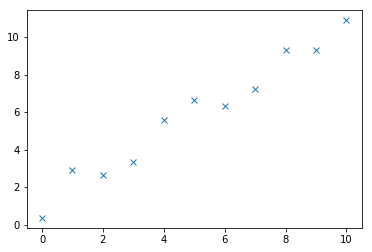

In [10]:
plt.plot(t, b, 'x')

In [11]:
x = aprox_dados(t, b) #b = 1(x1) + t(x2)
print(x)

[[ 11.  55.]
 [ 55. 385.]] [ 64.66327174 430.17150699]
[1.02142705 0.97141044]
